In [1]:
#IMPORTANDO BIBLIOTECAS
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import BoundaryNorm
from scipy.interpolate import griddata  
import numpy.ma as ma
import folium
from folium.plugins import HeatMap
from mpltools import color
import os 
import seaborn as sns;
import math;

from bokeh.io import output_file, show
from bokeh.models import ColumnDataSource
from bokeh.palettes import Spectral6, viridis
from bokeh.plotting import figure
from bokeh.transform import factor_cmap

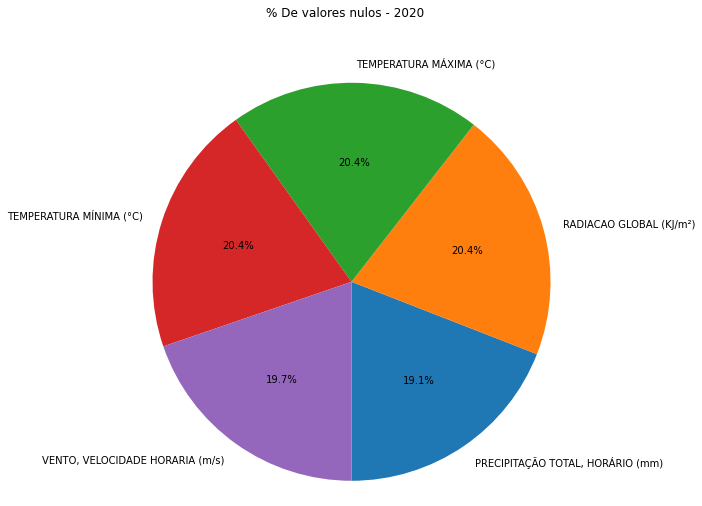

In [2]:
dfConsolidado = pd.read_csv("../datasets/consolidado.csv",";");  

dados = dfConsolidado.isnull().sum(); 

# matplotlib-exemplo-41
# grafico de pizza
datax = np.array([dados['PRECIPITAÇÃO TOTAL, HORÁRIO (mm)'], dados['RADIACAO GLOBAL (KJ/m²)'], dados['TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C)'],dados['TEMPERATURA MÍNIMA NA HORA ANT. (AUT) (°C)'], dados['VENTO, VELOCIDADE HORARIA (m/s)']])
labels = [ 'PRECIPITAÇÃO TOTAL, HORÁRIO (mm)', 'RADIACAO GLOBAL (KJ/m²)', 'TEMPERATURA MÁXIMA (°C)', 'TEMPERATURA MÍNIMA (°C)', 'VENTO, VELOCIDADE HORARIA (m/s)']
explode = ( 0, 0, 0, 0,0 )
colrs=['cyan', 'tan', 'wheat','green','blue' ]
# graficos
fig, ax = plt.subplots(figsize=(8, 8))
ax.pie(datax, explode=explode, labels=labels, autopct='%1.1f%%',startangle=270)
ax.axis('equal') # mantenha um circulo
fig.suptitle("% De valores nulos - 2020");
#fig.savefig('data/pizza.png', dpi=125)


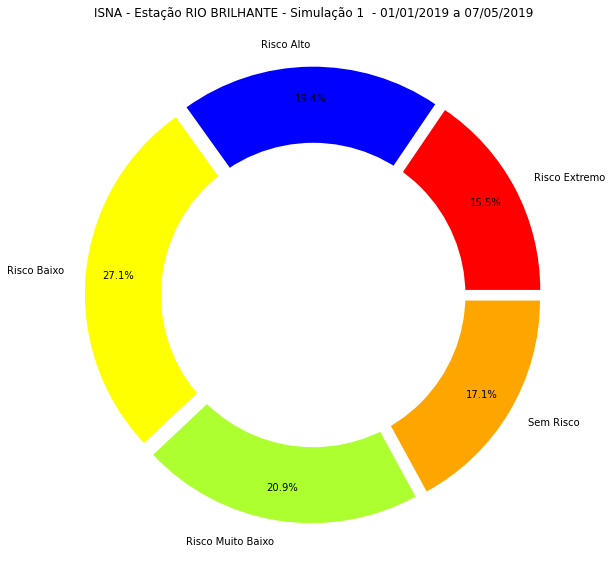

In [3]:
import matplotlib.pyplot as plt
  
# Setting labels for items in Chart
Employee = ['Risco Extremo', 'Risco Alto', 'Risco Baixo',
            'Risco Muito Baixo', 'Sem Risco']
  
# Setting size in Chart based on 
# given values
Salary = [40000, 50000, 70000, 54000, 44000]
  
# colors
colors = ['#FF0000', '#0000FF', '#FFFF00', 
          '#ADFF2F', '#FFA500']
# explosion
explode = (0.05, 0.05, 0.05, 0.05, 0.05)
  
# Pie Chart
plt.subplots(figsize=(10, 10))
plt.pie(Salary, colors=colors, labels=Employee,
        autopct='%1.1f%%', pctdistance=0.85,
        explode=explode)
  
# draw circle
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
  
# Adding Circle in Pie chart
fig.gca().add_artist(centre_circle)
  
# Adding Title of chart
plt.title('ISNA - Estação RIO BRILHANTE - Simulação 1  - 01/01/2019 a 07/05/2019')
  
# Displaing Chart
plt.show()

In [4]:
from bokeh.palettes import magma, Category10                  # paleta de cores
 
dados = dfConsolidado.isnull().sum(); 
    
# cria a data
x_data = ['PRECIPITAÇÃO TOTAL, HORÁRIO (mm)','RADIACAO GLOBAL (KJ/m²)','TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C)','TEMPERATURA MÍNIMA NA HORA ANT. (AUT) (°C)','VENTO, VELOCIDADE HORARIA (m/s)']
y_data = [dados['PRECIPITAÇÃO TOTAL, HORÁRIO (mm)'], dados['RADIACAO GLOBAL (KJ/m²)'], dados['TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C)'],dados['TEMPERATURA MÍNIMA NA HORA ANT. (AUT) (°C)'], dados['VENTO, VELOCIDADE HORARIA (m/s)']]

data = ColumnDataSource(data=dict(x_data=x_data, y_data=y_data))  

p = figure(x_range=x_data,
           #plot_width=600,
           plot_height=450, 
           #toolbar_location=None, 
           title="% De valores nulos"
          )  # cria figura
p.vbar(x='x_data', 
       top='y_data', 
       width=0.9, 
       source=data, 
       legend_field="x_data",
       line_color='white',
       #fill_color=factor_cmap('x_data', palette=viridis(10), factors=x_data)  # cores
       #fill_color=factor_cmap('x_data', palette=magma(10), factors=x_data)
       #fill_color=factor_cmap('x_data', palette=Spectral6[10], factors=x_data)   # 6 cores
       fill_color=factor_cmap('x_data', palette=Category10[10], factors=x_data)
      )
#
#p.xaxis.major_label_orientation = "vertical"  # legend orientation
#p.legend.orientation = "horizontal"
p.xaxis.major_label_orientation = np.math.pi/4   # legend orientation by angle pi/x
#p.legend.location = "top_center"
#show(p)

In [5]:
# Estações por região
from bokeh.palettes import magma, Category10                  # paleta de cores
 
coordenadas = pd.read_csv("../datasets/coords.csv",";");  
coordenadas_group  = coordenadas.groupby(['ANO','REGIAO'],as_index=False)['ESTADO'].count().round(2);
 
# cria a data
#x_data =coordenadas_group.REGIAO
x_data = ['Centro-Oeste','Norte','Nordeste','Sul','Sudeste']
y_data = coordenadas_group.ESTADO

data = ColumnDataSource(data=dict(x_data=x_data, y_data=y_data))  

p = figure(x_range=x_data,
           #plot_width=600,
           plot_height=450, 
           #toolbar_location=None, 
           title="Estações por Região"
          )  # cria figura

p.vbar(x='x_data', 
       top='y_data', 
       width=0.8, 
       source=data, 
     #  legend_field="x_data",
       line_color='white',
       fill_color=factor_cmap('x_data', palette=Category10[10], factors=x_data)
      )

#p.xaxis.major_label_orientation = "vertical"  # legend orientation
#p.legend.orientation = "horizontal"
p.xaxis.major_label_orientation = np.math.pi/4   # legend orientation by angle pi/x
#p.legend.location = "top_center"
show(p)




In [6]:
# Estações por Estado
from bokeh.palettes import magma, Category10                  # paleta de cores
 
coordenadas = pd.read_csv("../datasets/coords.csv",";") 
coordenadas_group  = coordenadas.groupby(['ANO','ESTADO'],as_index=False)['CODIGO'].count().round(2);
print(coordenadas_group)


     ANO ESTADO  CODIGO
0   2021     AC       7
1   2021     AL       7
2   2021     AM      19
3   2021     AP       4
4   2021     BA      47
5   2021     CE      16
6   2021     DF       5
7   2021     ES      13
8   2021     GO      26
9   2021     MA      17
10  2021     MG      68
11  2021     MS      45
12  2021     MT      37
13  2021     PA      32
14  2021     PB       9
15  2021     PE      13
16  2021     PI      21
17  2021     PR      26
18  2021     RJ      26
19  2021     RN       8
20  2021     RO       4
21  2021     RR       1
22  2021     RS      44
23  2021     SC      24
24  2021     SE       7
25  2021     SP      42
26  2021     TO      20


In [8]:
# Estações por Estado - Centro Oeste
from bokeh.palettes import magma, Category20                  # paleta de cores
 
coordenadas = pd.read_csv("../datasets/coords.csv",";") 
coordenadas = coordenadas[(coordenadas['REGIAO'] == 'CO')]                          
                       
coordenadas_group  = coordenadas.groupby(['ANO','ESTADO'],as_index=False)['CODIGO'].count().round(2);
 
# cria a data
#x_data =coordenadas_group.REGIAO
x_data = coordenadas_group.ESTADO
y_data = coordenadas_group.CODIGO

data = ColumnDataSource(data=dict(x_data=x_data, y_data=y_data))  

p = figure(x_range=x_data,
           #plot_width=600,
           plot_height=450, 
           #toolbar_location=None, 
           title="Estações por Estado - Centro Oeste"
          )  # cria figura

p.vbar(x='x_data', 
       top='y_data', 
       width=0.8, 
       source=data, 
     #  legend_field="x_data",
       line_color='white',
       fill_color=factor_cmap('x_data', palette=Category20[20], factors=x_data)
      )

#p.xaxis.major_label_orientation = "vertical"  # legend orientation
#p.legend.orientation = "horizontal"
p.xaxis.major_label_orientation = np.math.pi/4   # legend orientation by angle pi/x
#p.legend.location = "top_center"
show(p)


